In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.10.0


In [2]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print('Traning entries: {}, labels: {}'.format(
      len(train_data), len(train_labels)
))
print(train_data[0])
print(len(train_data[0]), len(train_data[1]))

Traning entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218 189


In [4]:
word_index = imdb.get_word_index()
word_index = {k:(v+3) for (k, v) in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [5]:
decode_review(train_data[20])

"<START> shown in australia as <UNK> this incredibly bad movie is so bad that you become <UNK> and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school <UNK> class the sets are pathetic but <UNK> better than the <UNK> and the acting is wooden br br the <UNK> <UNK> seems to have been stolen from the props <UNK> of <UNK> <UNK> there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money"

In [6]:
train_data = keras.preprocessing.sequence.pad_sequences(
    train_data,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256
)
test_data = keras.preprocessing.sequence.pad_sequences(
    test_data,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256
)

In [7]:
print(len(train_data[0]), len(train_data[1]))
print(train_data[0])

256 256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  10

In [8]:
vocab_size=10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
dropout (Dropout)            (None, None, 32)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 320,545
Trainable params: 320,545
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [10]:
x_val = train_data[:10000]
partial_x_train=train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]


In [11]:
#每一Epochs都进行F1计算
import numpy as np
from keras.callbacks import Callback
from keras.engine.training import Model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
 
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict,average='weighted')
        _val_recall = recall_score(val_targ, val_predict,average='weighted')
        _val_precision = precision_score(val_targ, val_predict,average='weighted')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print( ' — val_f1: %f — val_precision: %f — val_recall %f' %(_val_f1, _val_precision, _val_recall))
        return
    
metrics = Metrics()

Using TensorFlow backend.


In [12]:
from keras.callbacks import EarlyStopping
earlystopping=keras.callbacks.EarlyStopping(monitor='val_acc', patience=8, verbose=0, mode='max')

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=120,
                    batch_size=1024,
                    validation_data=(x_val, y_val),
                    callbacks=[metrics,earlystopping],
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/120
15000/15000 [==============================] - 4s 236us/step - loss: 0.7814 - acc: 0.5001 - val_loss: 0.6932 - val_acc: 0.5066
 — val_f1: 0.474342 — val_precision: 0.512365 — val_recall 0.506600
Epoch 2/120
15000/15000 [==============================] - 1s 82us/step - loss: 0.7377 - acc: 0.4989 - val_loss: 0.6921 - val_acc: 0.5133
 — val_f1: 0.386457 — val_precision: 0.608389 — val_recall 0.513300
Epoch 3/120
15000/15000 [==============================] - 1s 83us/step - loss: 0.7099 - acc: 0.5054 - val_loss: 0.6900 - val_acc: 0.5621
 — val_f1: 0.527848 — val_precision: 0.582964 — val_recall 0.562100
Epoch 4/120
15000/15000 [==============================] - 1s 81us/step - loss: 0.6990 - acc: 0.5090 - val_loss: 0.6887 - val_acc: 0.6142
 — val_f1: 0.614210 — val_precision: 0.614238 — val_recall 0.614200
Epoch 5/120
15000/15000 [==============================] - 1s 82us/step - loss: 0.6931 - acc: 0.5204 - val_loss: 0.6876 - val

15000/15000 [==============================] - 1s 83us/step - loss: 0.4317 - acc: 0.8248 - val_loss: 0.4162 - val_acc: 0.8552
 — val_f1: 0.855204 — val_precision: 0.855296 — val_recall 0.855200
Epoch 41/120
15000/15000 [==============================] - 1s 85us/step - loss: 0.4287 - acc: 0.8271 - val_loss: 0.4075 - val_acc: 0.8572
 — val_f1: 0.857189 — val_precision: 0.857221 — val_recall 0.857200
Epoch 42/120
15000/15000 [==============================] - 1s 82us/step - loss: 0.4191 - acc: 0.8324 - val_loss: 0.4000 - val_acc: 0.8598
 — val_f1: 0.859673 — val_precision: 0.860642 — val_recall 0.859800
Epoch 43/120
15000/15000 [==============================] - 1s 82us/step - loss: 0.4099 - acc: 0.8359 - val_loss: 0.3908 - val_acc: 0.8625
 — val_f1: 0.862437 — val_precision: 0.862856 — val_recall 0.862500
Epoch 44/120
15000/15000 [==============================] - 1s 84us/step - loss: 0.3994 - acc: 0.8406 - val_loss: 0.3840 - val_acc: 0.8626
 — val_f1: 0.862603 — val_precision: 0.862629 

 — val_f1: 0.885503 — val_precision: 0.885556 — val_recall 0.885500
Epoch 80/120
15000/15000 [==============================] - 1s 83us/step - loss: 0.2503 - acc: 0.9127 - val_loss: 0.2856 - val_acc: 0.8855
 — val_f1: 0.885478 — val_precision: 0.885616 — val_recall 0.885500
Epoch 81/120
15000/15000 [==============================] - 1s 85us/step - loss: 0.2460 - acc: 0.9156 - val_loss: 0.2850 - val_acc: 0.8861
 — val_f1: 0.886100 — val_precision: 0.886099 — val_recall 0.886100
Epoch 82/120
15000/15000 [==============================] - 1s 82us/step - loss: 0.2371 - acc: 0.9185 - val_loss: 0.2849 - val_acc: 0.8855
 — val_f1: 0.885499 — val_precision: 0.885732 — val_recall 0.885500
Epoch 83/120
15000/15000 [==============================] - 1s 85us/step - loss: 0.2392 - acc: 0.9151 - val_loss: 0.2836 - val_acc: 0.8868
 — val_f1: 0.886793 — val_precision: 0.886815 — val_recall 0.886800
Epoch 84/120
15000/15000 [==============================] - 1s 83us/step - loss: 0.2345 - acc: 0.9178 - 

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

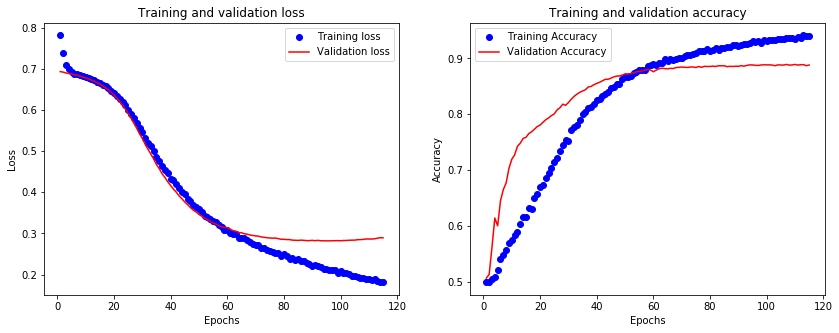

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

figure = plt.figure(figsize=(14, 5))

ax = figure.add_subplot(1, 2, 1)
# "bo" is for "blue dot"
ax.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
ax.plot(epochs, val_loss, 'r', label='Validation loss')
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()


ax = figure.add_subplot(1, 2, 2)
# "bo" is for "blue dot"
ax.plot(epochs, acc, 'bo', label='Training Accuracy')
# b is for "solid blue line"
ax.plot(epochs, val_acc, 'r', label='Validation Accuracy')
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

plt.show()